# Assignment 02

## Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it. The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts. The thought of it makes you shiver. This is not scalable or repeatable. 

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

### Inspect the Data!

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

#### 1.
The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.
- Open some of the census csv files in the navigator. 
    - How are they named? 
    - What kind of information do they hold? 
    - Will they help us make this graph?

In [2]:
state0 = pd.read_csv("./data/assign2/states0.csv")
state0.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F


In [3]:
state1 = pd.read_csv("./data/assign2/states1.csv")
state1.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F


In [4]:
state2 = pd.read_csv("./data/assign2/states2.csv")
state2.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,$50811.08205128205,4883331M_5123362F
1,1,Hawaii,1406299,9.186708860759486%,25.032278481012657%,2.052848101265823%,0.1449367088607596%,36.59208860759495%,8.758860759493672%,$73264.42628205128,709871M_696428F


In [5]:
state3 = pd.read_csv("./data/assign2/states3.csv")
state3.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Iowa,3093526,5.30364520048603%,87.71968408262464%,3.2569866342648868%,0.2897934386391251%,1.699392466585662%,0.055164034021871235%,$53017.75304136253,1534595M_1558931F
1,1,Kansas,2892987,11.644342105263148%,75.95828947368425%,6.5678947368421%,0.7339473684210529%,2.331052631578946%,NaN,$53885.612648221344,1439862M_1453125F


In [6]:
state4 = pd.read_csv("./data/assign2/states4.csv")
state4.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F
1,1,Massachusetts,6705586,11.461065573770476%,73.04105191256845%,6.83312841530056%,0.12827868852459007%,5.835655737704914%,0.0198087431693989%,$72838.93672627235,3249650M_3455936F


In [7]:
state5 = pd.read_csv("./data/assign2/states5.csv")
state5.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,$49763.98772563177,2964003M_3081445F
1,1,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,$47645.682835820895,510163M_F


In [8]:
state6 = pd.read_csv("./data/assign2/states6.csv")
state6.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,New Jersey,8904413,18.74950049950049%,56.488761238761285%,14.387862137862117%,0.11533466533466513%,8.159990009990018%,0.031318681318681325%,$76581.08341708542,4343027M_4561386F
1,1,New Mexico,2084117,45.28293172690762%,40.69799196787147%,1.7550200803212852%,9.248594377510045%,1.23433734939759%,0.04277108433734938%,$47329.96787148595,1032414M_1051703F


In [9]:
state7 = pd.read_csv("./data/assign2/states7.csv")
state7.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,$49655.24846625767,5662893M_5913084F
1,1,Oklahoma,3849733,10.0799043062201%,66.05942583732046%,8.314736842105255%,6.716842105263157%,1.8011483253588516%,0.10622009569377985%,$48100.85426653883,1906944M_1942789F


In [10]:
state8 = pd.read_csv("./data/assign2/states8.csv")
state8.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M_2455167F


In [11]:
state9 = pd.read_csv("./data/assign2/states9.csv")
state9.head(2)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F


#### 2.
It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?
- Using glob, 
    - loop through the census files available
    - load them into DataFrames.
    - concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [12]:
files = glob.glob("./data/assign2/state*.csv")
files

['./data/assign2\\states0.csv',
 './data/assign2\\states1.csv',
 './data/assign2\\states2.csv',
 './data/assign2\\states3.csv',
 './data/assign2\\states4.csv',
 './data/assign2\\states5.csv',
 './data/assign2\\states6.csv',
 './data/assign2\\states7.csv',
 './data/assign2\\states8.csv',
 './data/assign2\\states9.csv']

In [13]:
# making a single data frame from multiple files
us_census_list = []
for filename in files:
    data = pd.read_csv(filename)
    us_census_list.append(data)
us_census = pd.concat(us_census_list)
us_census.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


#### 3.
Look at the .columns and the .dtypes of the us_census DataFrame. 
- Are those datatypes going to hinder you as you try to make histograms?

In [14]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [15]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

#### 4.
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

In [16]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


### Regex to the Rescue

#### 5.
Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [17]:
# view icome column
us_census.Income.head()

0    $43296.35860306644
1    $70354.74390243902
2    $54207.82095490716
3    $41935.63396778917
4    $67264.78230266465
Name: Income, dtype: object

In [18]:
us_census.Income = us_census["Income"].replace("[\$,]","", regex = True)
us_census.Income.head()

0    43296.35860306644
1    70354.74390243902
2    54207.82095490716
3    41935.63396778917
4    67264.78230266465
Name: Income, dtype: object

In [19]:
us_census.Income = pd.to_numeric(us_census.Income)
us_census.Income.head()

0    43296.358603
1    70354.743902
2    54207.820955
3    41935.633968
4    67264.782303
Name: Income, dtype: float64

#### 6.
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.
- Split the column into those two new columns using str.split and separating out those results.

In [20]:
us_census.GenderPop.head()

0      2341093M_2489527F
1        384160M_349215F
2      3299088M_3342840F
3      1451913M_1506295F
4    19087135M_19334329F
Name: GenderPop, dtype: object

In [21]:
us_census["str_split"] = us_census["GenderPop"].str.split("_")
us_census.str_split.head()

0      [2341093M, 2489527F]
1        [384160M, 349215F]
2      [3299088M, 3342840F]
3      [1451913M, 1506295F]
4    [19087135M, 19334329F]
Name: str_split, dtype: object

In [22]:
us_census["MenPop"] = us_census.str_split.str.get(0)
us_census["WomenPop"] = us_census.str_split.str.get(1)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,str_split,MenPop,WomenPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,"[2341093M, 2489527F]",2341093M,2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,"[384160M, 349215F]",384160M,349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,"[3299088M, 3342840F]",3299088M,3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,"[1451913M, 1506295F]",1451913M,1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,"[19087135M, 19334329F]",19087135M,19334329F


In [23]:
del us_census["str_split"]
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MenPop,WomenPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135M,19334329F


#### 7.
Convert both of the columns into numerical datatypes. There is still an M or an F character in each entry! We should remove those before we convert.

In [24]:
us_census.WomenPop.head(5)

0     2489527F
1      349215F
2     3342840F
3     1506295F
4    19334329F
Name: WomenPop, dtype: object

In [25]:
us_census.MenPop.head(5)

0     2341093M
1      384160M
2     3299088M
3     1451913M
4    19087135M
Name: MenPop, dtype: object

In [26]:
us_census.MenPop = us_census["MenPop"].replace("[M]","", regex = True)
us_census.MenPop = pd.to_numeric(us_census.MenPop)
us_census.MenPop.head()
us_census.MenPop.head()

0     2341093
1      384160
2     3299088
3     1451913
4    19087135
Name: MenPop, dtype: int64

In [27]:
us_census.WomenPop = us_census["WomenPop"].replace("[F]","", regex = True)
us_census.WomenPop = pd.to_numeric(us_census.WomenPop)
us_census.WomenPop.head()

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
Name: WomenPop, dtype: float64

#### 8.
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!
- Use matplotlib to make a scatterplot!
    - plt.scatter(the_women_column, the_income_column) 
    - Remember to call plt.show() to see the graph!

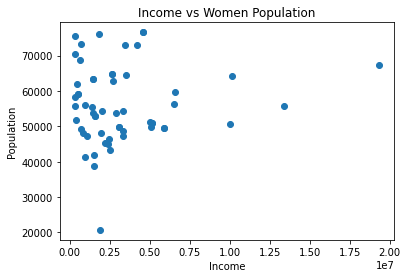

In [28]:
plt.scatter(us_census.WomenPop, us_census.Income)
plt.title("Income vs Women Population")
plt.xlabel("Income")
plt.ylabel("Population")
plt.show()

#### 9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [29]:
# No null value in Income column
us_census.Income.isnull().value_counts()

False    60
Name: Income, dtype: int64

In [30]:
# No null value in Mens column
us_census.MenPop.isnull().value_counts()

False    60
Name: MenPop, dtype: int64

In [31]:
# three null value in Women column
us_census.WomenPop.isnull().value_counts()

False    57
True      3
Name: WomenPop, dtype: int64

In [32]:
# No null value in Population column
us_census.TotalPop.isnull().value_counts()

False    60
Name: TotalPop, dtype: int64

In [33]:
us_census = us_census.fillna(value={"WomenPop":us_census.TotalPop - us_census.MenPop})

In [34]:
# Now no null value in Women column
us_census.WomenPop.isnull().value_counts()

False    60
Name: WomenPop, dtype: int64

### 10.
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [35]:
# 9 duplicte values
us_census.State.duplicated().value_counts()

False    51
True      9
Name: State, dtype: int64

## 11.
Drop those duplicates using the .drop_duplicates() function.

In [36]:
us_census = us_census.drop_duplicates(["State"])

In [37]:
# Now no duplicte values
us_census.State.duplicated().value_counts()

False    51
Name: State, dtype: int64

### 12.
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

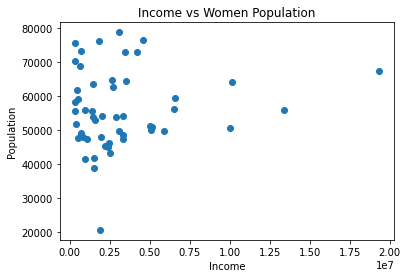

In [38]:
plt.scatter(us_census.WomenPop, us_census.Income)
plt.title("Income vs Women Population")
plt.xlabel("Income")
plt.ylabel("Population")
plt.show()

### Histograms of Races

#### 13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [39]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'MenPop',
       'WomenPop'],
      dtype='object')

### 14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [40]:
us_census[['Hispanic', 'White', 'Black','Native', 'Asian', 'Pacific']].head()

,Hispanic,White,Black,Native,Asian,Pacific
0,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%
1,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%
2,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%
3,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%
4,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%


In [41]:
us_census.Hispanic = us_census.Hispanic.replace('[\%]', '', regex=True)
us_census.White = us_census.White.replace('[\%]', '', regex=True)
us_census.Black = us_census.Black.replace('[\%]', '', regex=True)
us_census.Native = us_census.Native.replace('[\%]', '', regex=True)
us_census.Asian = us_census.Asian.replace('[\%]', '', regex=True)
us_census.Pacific = us_census.Pacific.replace('[\%]', '', regex=True)
us_census[['Hispanic', 'White', 'Black','Native', 'Asian', 'Pacific']].head()

,Hispanic,White,Black,Native,Asian,Pacific
0,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865
1,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378
2,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833
3,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315
4,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353


In [42]:
us_census[['Hispanic', 'White', 'Black','Native', 'Asian', 'Pacific']].dtypes

Hispanic    object
White       object
Black       object
Native      object
Asian       object
Pacific     object
dtype: object

In [43]:
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)
us_census[['Hispanic', 'White', 'Black','Native', 'Asian', 'Pacific']].dtypes

Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
dtype: object

In [44]:
us_census.Hispanic.isnull().value_counts()

False    51
Name: Hispanic, dtype: int64

Hispanic


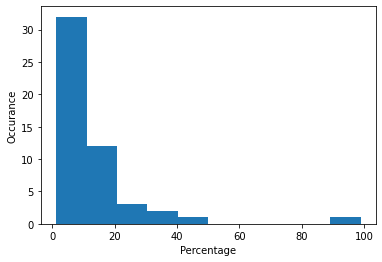

In [45]:
plt.hist(us_census.Hispanic)
print("Hispanic")
plt.xlabel('Percentage')
plt.ylabel('Occurance')
plt.show()

In [46]:
us_census.White.isnull().value_counts()

False    51
Name: White, dtype: int64

White


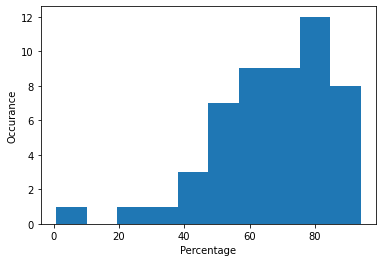

In [47]:
plt.hist(us_census.White)
print("White")
plt.xlabel('Percentage')
plt.ylabel('Occurance')
plt.show()

In [48]:
us_census.Black.isnull().value_counts()

False    51
Name: Black, dtype: int64

Black


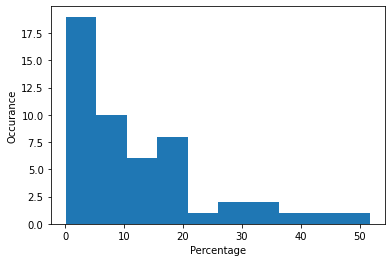

In [49]:
plt.hist(us_census.Black)
print("Black")
plt.xlabel('Percentage')
plt.ylabel('Occurance')
plt.show()

In [50]:
us_census.Native.isnull().value_counts()

False    51
Name: Native, dtype: int64

Native


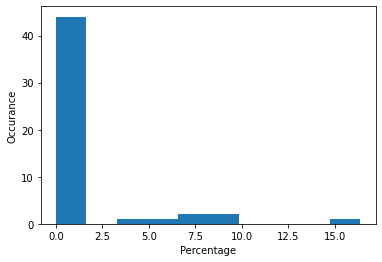

In [51]:
plt.hist(us_census.Native)
print("Native")
plt.xlabel('Percentage')
plt.ylabel('Occurance')
plt.show()

In [52]:
us_census.Asian.isnull().value_counts()

False    51
Name: Asian, dtype: int64

Asian


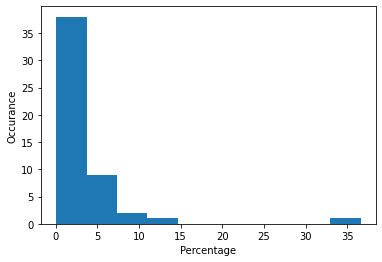

In [53]:
plt.hist(us_census.Asian)
print("Asian")
plt.xlabel('Percentage')
plt.ylabel('Occurance')
plt.show()

In [54]:
us_census.Pacific.isnull().value_counts()

False    47
True      4
Name: Pacific, dtype: int64

In [55]:
us_census.Pacific = us_census.Pacific.fillna(value=us_census.Pacific.mean())

In [56]:
us_census.Pacific.isnull().value_counts()

False    51
Name: Pacific, dtype: int64

Pacific


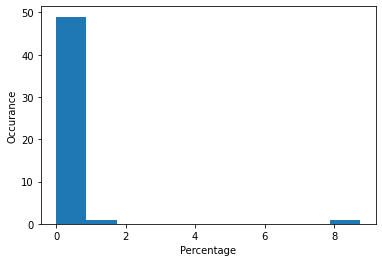

In [57]:
plt.hist(us_census.Pacific)
print("Pacific")
plt.xlabel('Percentage')
plt.ylabel('Occurance')
plt.show()

### Get Creative
#### 15.
Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

#### A.

In [58]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'MenPop',
       'WomenPop'],
      dtype='object')

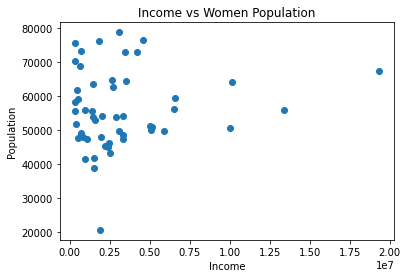

In [59]:
plt.scatter(us_census.WomenPop, us_census.Income)
plt.title("Income vs Women Population")
plt.xlabel("Income")
plt.ylabel("Population")
plt.show()

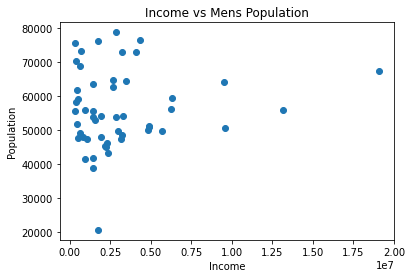

In [60]:
plt.scatter(us_census.MenPop, us_census.Income)
plt.title("Income vs Mens Population")
plt.xlabel("Income")
plt.ylabel("Population")
plt.show()

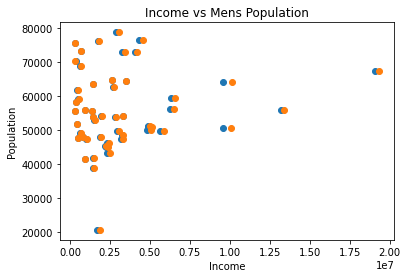

In [61]:
plt.scatter(us_census.MenPop, us_census.Income)
plt.scatter(us_census.WomenPop, us_census.Income)
plt.title("Income vs Mens Population")
plt.xlabel("Income")
plt.ylabel("Population")
plt.show()

#### B

In [62]:
us_census.head(5)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MenPop,WomenPop
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329.0


In [63]:
us_census.State.head(5)

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: State, dtype: object

In [64]:
print((us_census.Hispanic+us_census.White+us_census.Black+us_census.Native+us_census.Asian+us_census.Pacific).head())

0    98.421088
1    92.568263
2    97.936184
3    98.134161
4    96.993997
dtype: float64


In [65]:
us_census["Others"] =100-(us_census.Hispanic+us_census.White+us_census.Black+us_census.Native+us_census.Asian+us_census.Pacific)

In [66]:
print((us_census.Hispanic+us_census.White+us_census.Black+us_census.Native+us_census.Asian+us_census.Pacific+us_census.Others).head())

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
dtype: float64


In [67]:
alabama=us_census.loc[us_census['State']== "Alabama"]
alabama

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MenPop,WomenPop,Others
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527.0,1.578912


In [68]:
data = alabama[['Hispanic', 'White', 'Black','Native', 'Asian', 'Pacific','Others']].transpose()
data

,0
Hispanic,3.751616
White,61.878656
Black,31.252976
Native,0.453231
Asian,1.050255
Pacific,0.034354
Others,1.578912


array([<AxesSubplot:ylabel='0'>], dtype=object)

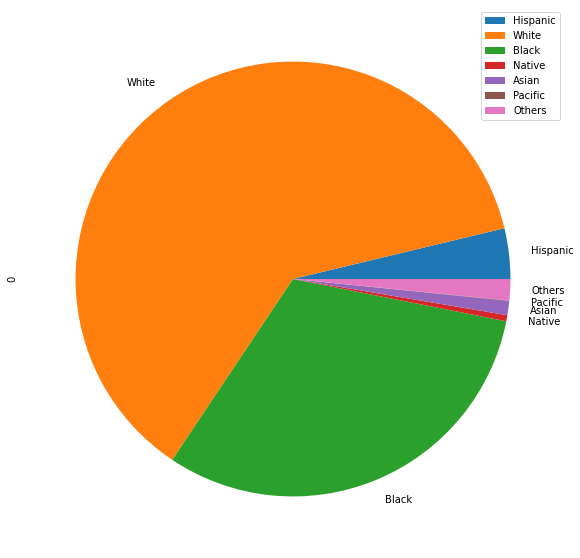

In [69]:
data.plot(kind = 'pie', subplots=True, figsize=((10,10)))